# Testing Different Classifiers, Hyertuning Methods, and Speed on Diabetes Classification Dataset

1. Linear Regression Classifer
    1. Classification
2. Random Forest Classifier
    1. Classification
    2. Feature Importance
    3. Hyper-Parameter Tuning
3. Support Vector Machine
    1. Preprocesing
    2. Classification
    3. Hyper-Parameter Tuning
    4. Cross-Validation Results
4. Principal Component Analysis
    1. Dimensionality reduction is an essential task in many data analysis exercises, and it involves projecting the data to a lower-dimensional space using Singular Value Decomposition. 


In [81]:
#export
import numpy as np
import pandas as pd
import sys
# !{sys.executable} -m pip uninstall networkx
# !{sys.executable} -m pip install pandas==1.1.0
#!{sys.executable} -m pip install networkx==2.4
import time
import gc
import random
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
print(pd.__version__)
import tests as tests

1.1.3


# Data Import and Cleaning 

In [82]:
class Data():
    """
    Class for the Data for the models
    """
    def dataAllocation(self,path):
        
        """
        Separate out the x_data and y_data and return each
        
            args: string path for .csv file
            
            return: pandas dataframe, pandas dataframe
        """
        
        data = pd.read_csv(path)
        x_data = data.loc[:,data.columns != "y"].to_numpy()
        y_data = data.loc[:,"y"].to_numpy()
        
        return x_data,y_data
    
    def trainSets(self,x_data,y_data):
        """
        Split 70% of the data into training and 30% into test sets. Call them x_train, x_test, y_train and y_test.
        Use the train_test_split method in sklearn with the parameter 'shuffle' set to true and the 'random_state' set to 614.
            
            args: pandas dataframe, pandas dataframe
            
            return: pandas dataframe, pandas dataframe, pandas series, pandas series
        """
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 614, shuffle=True)
        y_train = pd.Series(y_train) 
        y_test = pd.Series(y_test) 

        return x_train, x_test, y_train, y_test

# Linear Regression

In [83]:
class LinearRegressionModel():
    """
    Class for Linear Regression Model
    """
    def linearClassifer(self,x_train, x_test, y_train):
        """
        Create a LinearRegression classifier and train it.
            
            args: pandas dataframe, pandas dataframe, pandas series
            
            return: numpy array, numpy array
        """
        
        lm_model = LinearRegression().fit(x_train, y_train)
        
        y_predict_train = lm_model.predict(x_train)
        y_predict_test = lm_model.predict(x_test)
        

        return y_predict_train, y_predict_test


    def lgTrainAccuracy(self,y_train,y_predict_train):
        """
        Return accuracy (on the training set) using the accuracy_score method.
        Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0.
            
            args: pandas series, numpy array
            
            return: float
        """

        #predict 
        y_predict_train = np.where(y_predict_train >= 0.5, 1, 0)
        #get the results
        train_accuracy = accuracy_score(y_train,y_predict_train)

        return train_accuracy
    

    def lgTestAccuracy(self,y_test,y_predict_test):
        
        """
        Return accuracy (on the testing set) using the accuracy_score method.
        Round the output values greater than or equal to 0.5 to 1 and those less than 0.5 to 0.
            
            args: pandas series, numpy array
            
            return: float
        
        """
        
        y_predict_test = np.where(y_predict_test >= 0.5, 1, 0)
        test_accuracy = accuracy_score(y_test,y_predict_test)

        return test_accuracy

# Random Forest Classifier

In [84]:
#export
class RFClassifier():
    """
    Class for Random Forest Classifier
    """
    
    def randomForestClassifier(self,x_train,x_test, y_train):
        """
        Create a RandomForestClassifier and train it. Set Random state to 614.
            
            args: pandas dataframe, pandas dataframe, pandas series
            
            return: RandomForestClassifier object, numpy array, numpy array
        """
  
        # make the model
        rf_clf = RandomForestClassifier(random_state = 614).fit(x_train, y_train)
        
        #form the model and test on it for first pass combine to steps into one
        y_predict_train = rf_clf.predict(x_train)
        y_predict_test = rf_clf.predict(x_test)

        return rf_clf,y_predict_train, y_predict_test
    
    
    def rfTrainAccuracy(self,y_train,y_predict_train):
        """
        Return accuracy on the training set using the accuracy_score method.
            
            args: pandas series, numpy array
            
            return: float
        """

        #how did the model do
        train_accuracy = accuracy_score(y_train,y_predict_train)
        
        return train_accuracy
    

    def rfTestAccuracy(self,y_test,y_predict_test):
        """
        Return accuracy on the test set using the accuracy_score method.
            
            args: pandas series, numpy array
            
            return: float
        """
        test_accuracy = accuracy_score(y_test,y_predict_test)
        
        return test_accuracy

    
### Feature Importance ###
    
    def rfFeatureImportance(self,rf_clf):
        """
        Determine the feature importance as evaluated by the Random Forest Classifier.
            
            args: RandomForestClassifier object
            
            return: float array
        """

        feature_importance = rf_clf.feature_importances_
        
  
        return feature_importance
    

    def sortedRFFeatureImportanceIndicies(self,rf_clf):
        """
        Sort them in the ascending order and return the feature numbers[0 to ...].
   
            args: RandomForestClassifier object
            
            return: int array
        """
        
        sorted_indices = np.argsort(rf_clf.feature_importances_)[::] #[::-1] if DESCENDING
       
    
        return sorted_indices
    
    
    
    
### Hyper-parameter Tuning ###


    def hyperParameterTuning(self,rf_clf,x_train,y_train):
        """
        Tune the hyper-parameters 'n_estimators' and 'max_depth'.
            
            args: RandomForestClassifier object, pandas dataframe, pandas series
            
            return: GridSearchCV object, float
             'n_estimators': [4, 16, 256]
             'max_depth': [2, 8, 16]
        """
        
        n_estimators = [4, 16, 256]
        max_depth = [2, 8, 16]
        param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}
        
        gscv_rfc = GridSearchCV(estimator = rf_clf, param_grid = param_grid)
        gscv_rfc_fit = gscv_rfc.fit(x_train, y_train)
        
        return gscv_rfc, gscv_rfc_fit
    

    def bestParams(self,gscv_rfc):
        """
        Get the best params, using .best_params_
            
            args:  GridSearchCV object
            
            return: parameter dict 
        """

        best_params = gscv_rfc.best_params_
       
        return best_params
    

    def bestScore(self,gscv_rfc):
        """        
        Get the best score, using .best_score_.
            
            args: GridSearchCV object
            
            return: float
        
        """
        best_score = gscv_rfc.best_score_
   
        return best_score

# Support Vector Machine

In [85]:
class SupportVectorMachine():
    
    """
    Class for Support Vector Machine Model
    """
    
### Pre-process ###

    def dataPreProcess(self,x_train,x_test):
        """
        Pre-process the data to standardize it, otherwise the grid search will take much longer.
            
            args: pandas dataframe, pandas dataframe
            
            return: pandas dataframe, pandas dataframe
        """
        scaler = StandardScaler()
        scaler.fit(x_train)
        scaled_x_train = scaler.transform(x_train)
        scaled_x_test = scaler.transform(x_test)
        
        return scaled_x_train, scaled_x_test
    
### Classification ###


    def SVCClassifer(self,scaled_x_train,scaled_x_test, y_train):
        # TODO: Create a SVC classifier and train it. Set gamma = 'auto'
        # args: pandas dataframe, pandas dataframe, pandas series
        # return: numpy array, numpy array
        # -------------------------------
        # ADD CODE HERE
       
        svm = SVC(gamma='auto').fit(scaled_x_train, y_train)
        
        y_predict_train = svm.predict(scaled_x_train)
        y_predict_test = svm.predict(scaled_x_test)
        # -------------------------------
        return y_predict_train,y_predict_test
    
    # points [1]
    def SVCTrainAccuracy(self,y_train,y_predict_train):
        # TODO: Return accuracy on the training set using the accuracy_score method.
        # args: pandas series, numpy array
        # return: float 
        # -------------------------------
        # ADD CODE HERE
        #train_accuracy = accuracy_score(y_predict_test,y_test)
        train_accuracy = accuracy_score(y_train,y_predict_train)
       
        # -------------------------------
        return train_accuracy
    
    # points [1]
    def SVCTestAccuracy(self,y_test,y_predict_test):
        """
        Return accuracy on the test set using the accuracy_score method.
            
            args: pandas series, numpy array
            
            return: float 
        """

        test_accuracy = accuracy_score(y_test,y_predict_test)
        
        return test_accuracy
    
### Hyper-parameter Tuning ###
    

    def SVMBestScore(self, scaled_x_train, y_train):
        """
        Tune the hyper-parameters 'C' and 'kernel' using rbf and linear.
        Setting n_jobs = -1 and return_train_score = True and gamma = 'auto'
        
            args: pandas dataframe, pandas series
            
            return: GridSearchCV object, float
        """

        svm_parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1.0]}
  
        svm = SVC(gamma = 'auto')
        svm_random = GridSearchCV(estimator = svm, param_grid = svm_parameters,n_jobs = -1,return_train_score = True)
        svm_cv = svm_random.fit(scaled_x_train, y_train)

        best_score = svm_random.best_score_
        
        return svm_cv, best_score
    

    def SVCClassiferParam(self,svm_cv,scaled_x_train,scaled_x_test,y_train):
        """
        Calculate the training and test set accuracy values after hyperparameter tuning and standardization. 
            
            args: GridSearchCV object, pandas dataframe, pandas dataframe, pandas series
            
            return: numpy series, numpy series
        """
        
        y_predict_train = svm_cv.predict(scaled_x_train)
        y_predict_test = svm_cv.predict(scaled_x_test)


        return y_predict_train,y_predict_test


    def svcTrainAccuracy(self,y_train,y_predict_train):
        """
        Return accuracy (on the training set) using the accuracy_score method.
            
            args: pandas series, numpy array
            
            return: float
        """
 
        
        train_accuracy = accuracy_score(y_train,y_predict_train)
       
        return train_accuracy


    def svcTestAccuracy(self,y_test,y_predict_test):
        """
        Return accuracy (on the test set) using the accuracy_score method.
            
            args: pandas series, numpy array
            
            return: float
        """
 
        test_accuracy = accuracy_score(y_test,y_predict_test)
        
   
        return test_accuracy
    
### Cross Validation Results ###


    def SVMRankTestScore(self,svm_cv):
        """
        Return the rank test score for all hyperparameter values that you obtained in SVMBestScore. The 
        GridSearchCV class holds a ‘cv_results_’ dictionary that allow reports of these metrics easily.
        
            args: GridSearchCV object 
            
            return: int array
        """
        
        rank_test_score= svm_cv.cv_results_['rank_test_score']
       

        return rank_test_score
    

    def SVMMeanTestScore(self,svm_cv):
        """
        Return mean test score for all of hyperparameter values that you obtained in SVMBestScore. The 
        GridSearchCV class holds a ‘cv_results_’ dictionary that allow reports of these metrics easily.
            
            args: GridSearchCV object
            
            return: float array
        """

    
        mean_test_score= svm_cv.cv_results_['mean_test_score']
       
        return mean_test_score

# PCA 

In [86]:
class PCAClassifer():
    """
    Class for PCA Classifier
    """

    def pcaClassifer(self,x_data):
        """
        Perform dimensionality reduction of the data using PCA.
        Set parameters n_component to 8 and svd_solver to 'full'. Keep other parameters at their default value.
        
            args: pandas dataframe
            
            return: pca_object
        """

        pca = PCA(n_components = 8, svd_solver = 'full').fit(x_data)
  
        return pca
    

    def pcaExplainedVarianceRatio(self, pca):
        """
        Return percentage of variance explained by each of the selected components
        
            args: pca_object
            
            return: float array
        """

        explained_variance_ratio = pca.explained_variance_ratio_
        
        return explained_variance_ratio

    def pcaSingularValues(self, pca):
        """
        Return the singular values corresponding to each of the selected components.
            
            args: pca_object
            
            return: float array
        """

        singular_values = pca.singular_values_
       

        return singular_values

In [90]:
if __name__ == "__main__":
    tests.dataTest(Data)
    print("\n")
    tests.linearTest(Data,LinearRegressionModel)
    print("\n")
    tests.RandomForestTest(Data,RFClassifier)
    print("\n")
    best_score_svm = tests.SupportVectorMachineTest(Data,SupportVectorMachine)
    print("\n")
    tests.PCATest(Data,PCAClassifer)
    
    

dataAllocation Function Executed
trainSets Function Executed


linearClassifer Function Executed
Linear Regression Train Accuracy:  0.7839851024208566
Linear Regression Test Accuracy:  0.7316017316017316


randomForestClassifier Function Executed
Random Forest Train Accuracy:  1.0
Random Forest Test Accuracy:  0.7316017316017316
Random Forest Feature Importance:  [0.07481604 0.25521095 0.08551354 0.07373347 0.0754602  0.1630978
 0.12729624 0.14487176]
Random Forest Sorted Feature Importance:  [3 0 4 2 6 7 5 1]
HyperParameterTuning Function Executed
Random Forest Best Parameters:  {'max_depth': 8, 'n_estimators': 256}
Random Forest Best Score:  0.7858255451713395


dataPreProcess Function Executed
SVCClassifer Function Executed
Support Vector Machine Trian Accuracy:  0.8324022346368715
Support Vector Machine Test Accuracy:  0.7272727272727273
Support Vector Machine Best Score:  0.7820526133610246
SVCClassiferParam Function Executed
Support Vector Machine Trian Accuracy:  0.7877094972067


# Analysis
Who did best? As the below table and graph illustrates, the Random Forest performed the best onthe test data. Principal Component Analysis (PCA) Dimensionality reduction is an essential task in many data analysis exercises, and it involves projecting the data to a lower-dimensional space using Singular Value Decomposition. This can be done in conjunction with the tested classifiers to get the percentage of variance explained by each of the selected components and thereofre, if one is limited to time or resources, use only the imporant features for training. This coudl alter the results, if for example, one model cannot be used because it is resource heavy, but then PCA allows it to be used, it may produce the best results and had not been used wihtout PCA. 

,Accuracy
Linear Classifier,0.731602
Random Forest,0.785826
SVM Classifier,0.757576


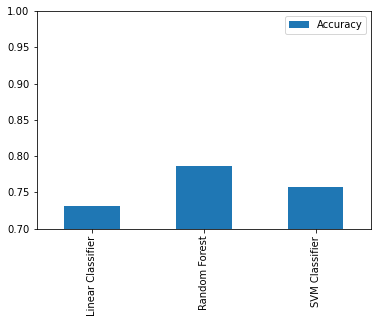

In [97]:
results = [0.7316017316017316,0.7858255451713395,0.7575757575757576]
models = ['Linear Classifier','Random Forest','SVM Classifier']
df = pd.DataFrame(list(zip(models, results)),columns =['Models', 'Accuracy'])

df.index = list(df["Models"])
df = df.drop(columns=['Models'])

df[['Accuracy']].plot.bar(ylim = (.70,1))

df